# Linear Regression Model On Student Score (Simple)
You are given a CSV file that contains student study hours and their scores.

Design ML model that can make prediction on score based on hours a student studied.

Steps:

**Collect data --> Split into training + testing --> Feed training data to model (i.e. train the model) --> Evaluate the model by feeding testing data**


In [5]:
import pandas as pd

In [6]:
# collect the data
df = pd.read_csv('data_simple_student_scores.csv')
print(df)

    Hours  Scores
0     2.5      21
1     5.1      47
2     3.2      27
3     8.5      75
4     3.5      30
5     1.5      20
6     9.2      88
7     5.5      60
8     8.3      81
9     2.7      25
10    7.7      85
11    5.9      62
12    4.5      41
13    3.3      42
14    1.1      17
15    8.9      95
16    2.5      30
17    1.9      24
18    6.1      67
19    7.4      69
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86
25    7.0      88
26    7.9      86
27    4.0      45
28    3.0      34
29    4.8      56
30    3.2      32
31    5.0      55
32    2.0      33
33    7.8      90


<Axes: title={'center': 'Scatterplot of hours and scores percentages'}, xlabel='Hours', ylabel='Scores'>

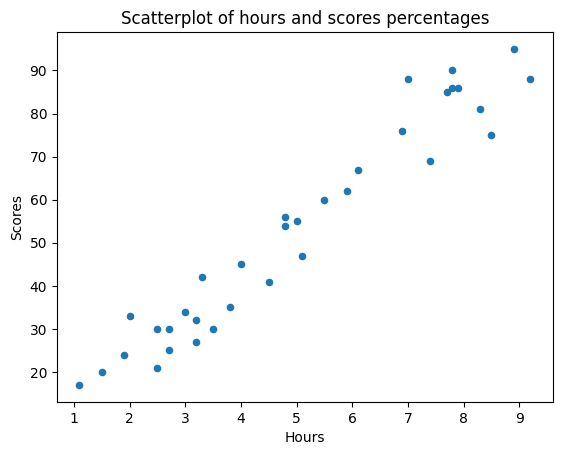

In [7]:
# Lets plot scatter graph between x and y variable

df.plot.scatter(x='Hours', y='Scores', title='Scatterplot of hours and scores percentages')

# Observ: There is a linear relation between x and y

In [ ]:
# 2

In [13]:
# Now we split the dataset into training / testing
# step1: Seperate your data into feature X and response y
X = df[['Hours']] # This is the feature that would predict the y
y = df['Scores']

In [11]:
# Step2: 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42) # random state for reproducibility

In [14]:
# Lets see how many records are in training and testing dataset
print("X_train shape:", X_train.shape)
print(f"X_test shape:", X_test.shape)

X_train shape: (27, 1)
X_test shape: (7, 1)


In [2]:
# 3

In [15]:
# Modelling and Training

from sklearn.linear_model import LinearRegression

model = LinearRegression()

# This can take long time depending on size of training data
model.fit(X_train, y_train) 

LinearRegression()

In [17]:
# Lets make a prediction on score of a student who studies for hours=9.5,
# and check against the above plot
new_data = pd.DataFrame([9.5,], columns=X_train.columns)

score = model.predict(new_data)

print(f"The score is {score}")

The score is [53.0132458]


In [ ]:
# 4

## Model Performance Evaluation

In [18]:
# step1: Lets make prediction on test data set
y_pred = model.predict(X_test)
print(y_pred)

[92.11216658 77.07412012 42.9878815  82.08680227 86.09694799 81.08426584
 51.00817294]


In [19]:
print(X_test)

    Hours
15    8.9
19    7.4
27    4.0
26    7.9
8     8.3
24    7.8
21    4.8


In [20]:
# step2: look at the actual test data
print(y_test)

15    95
19    69
27    45
26    86
8     81
24    86
21    54
Name: Scores, dtype: int64


In [21]:
# step3: Lets see the performance metric of the model 
from sklearn.metrics import r2_score

# Compute R-squared (R²) value
r2 = r2_score(y_test, y_pred)

print(f'R-squared: {r2:.4f}')  # closer to 1 is good

R-squared: 0.9256


## Pretty good r-square value

# STOP

# OPTIONAL

In [33]:
# Now lets the see absolute difference between the actual and prediction and also the percentage difference.

df_preds = pd.DataFrame({
    'hours': X_test.squeeze(),
    'actual_score': y_test.squeeze(),
    'predicted_score': y_pred.squeeze()})

df_preds['difference'] = (df_preds['actual_score'] - df_preds['predicted_score']).abs()

# Add the percentage difference column
df_preds['percentage_difference'] = (
    df_preds['difference'] / df_preds['actual_score']
) * 100

print(df_preds)

    hours  actual_score  predicted_score  difference  percentage_difference
15    8.9            95        92.112167    2.887833               3.039825
19    7.4            69        77.074120    8.074120              11.701623
27    4.0            45        42.987882    2.012118               4.471374
26    7.9            86        82.086802    3.913198               4.550230
8     8.3            81        86.096948    5.096948               6.292528
24    7.8            86        81.084266    4.915734               5.715970
21    4.8            54        51.008173    2.991827               5.540420


# Analyze:
## The y intercept
To find the equation of line, 
$$
y = a_0 + a_1 x_1 
$$
we need to find  $a_0$ and $a_1$. We can get that from the above model.

In [24]:
#calculate
a0 = model.intercept_ # intercept
a1 = model.coef_[0] # # x-coefficient or slope

print(f"The intercept a0: {a0}")
print(f"The x-coeff   a1: {a1}")

The intercept a0: 2.8864242966794436
The x-coeff   a1: 10.025364300989702


In [26]:
# Lets round them up
a0 = round(a0,4) # intercept
a1 = round(a1,4) # # x-coefficient or slope

print(f"The intercept (a0): {a0}")
print(f"The x-coeff (a1)  : {a1}")

The intercept (a0): 2.8864
The x-coeff (a1)  : 10.0254


This can quite literally be plugged in into our formula from before:
$$
y = a0 + a1 ∗ x_1
$$

**score = a0 + a1 ∗ hours**

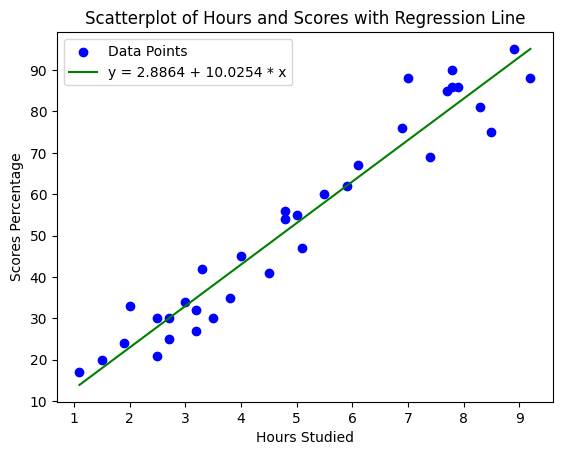

In [28]:
# Lets plot the model line
import numpy as np

x = df['Hours']
y = df['Scores']

# Create the scatter plot
plt.scatter(x, y, label="Data Points", color="blue")

# Generate x values for the line
x_line = np.linspace(x.min(), x.max(), 100)  # Create a range of x values
y_line = a0 + a1 * x_line   # Compute corresponding y values using the equation

# Plot the regression line
plt.plot(x_line, y_line, color="green", label=f"y = {a0} + {a1} * x")

# Add labels and title
plt.xlabel("Hours Studied")
plt.ylabel("Scores Percentage")
plt.title("Scatterplot of Hours and Scores with Regression Line")

plt.legend() # Show legend

plt.show() # Display the plot


## Lets calculate score manually and also using the predict method

In [35]:
# Lets write a simple code to calculate score based on eqn: 
# score = a0 + a1 * hours
a0 = model.intercept_ # intercept
a1 = model.coef_[0] # # x-coefficient or slope

hours = 9.5
score = a0 + a1 * hours

print(score)

98.1273851560816


In [36]:
new_data = pd.DataFrame([9.5,], columns=X_train.columns)
score = model.predict(new_data)
print(score)

[98.12738516]


### Both are same
This predicted value can also be obtained via the line intercept and slope value

# Predict values for larger dataset:

In [37]:
# Lets say someone gives you a large dataset to make predictions;
new_data = pd.DataFrame([8.3, 2.5, 5.9], columns=X_train.columns) # hours

# Lets make prediction on test data set
y_pred = model.predict(new_data)
print(y_pred)

[86.09694799 27.94983505 62.03607367]


# Model Deloyment: 
### Save the model and then send it to the server and users can  access your model.

In [38]:
# now lets save the model
import joblib

joblib.dump(model, 'linear_regression_model.pkl')

['linear_regression_model.pkl']

# Load the model later

In [39]:
# lets load the model
import joblib

loaded_model = joblib.load('linear_regression_model.pkl')

In [40]:
# make prediction
new_data = pd.DataFrame([9.5], columns=X_train.columns) # hours
score = loaded_model.predict(new_data)
print(score)

[98.12738516]
